__Statistical Learning in High Dimension__
<br>_Professor: M. Hebiri_
<br>_Student: Viktoriia Oliinyk_
### TP2. Projection estimation
#### Exercise 1. Fourier
1.1 _Data simulation_

In [171]:
import numpy as np
n = 100
X = np.random.uniform(0, 1, 100)
def f(x):
    return ((x**2)*(2**(x-1))-(x-0.5)**3)*np.sin(10*x)
sigma = 0.2
Ksi = np.random.normal(0, 1, 100)
Y = f(X) + sigma*Ksi

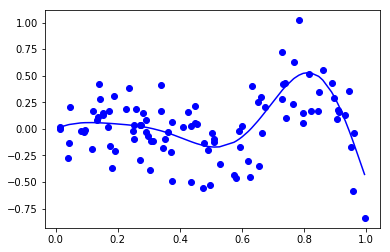

In [172]:
import matplotlib.pyplot as plt
ind_ord = X.argsort()
X = X[ind_ord]
Y = Y[ind_ord]
plt.plot(X, Y, 'bo')
plt.plot(X, f(X), '-b')
plt.show()

In [178]:
# Fourier basis
def phij (j, x):
    if j==1:
        return np.ones(len(x))
    elif (j%2==0):
        return np.sqrt(2)*np.cos(np.pi*j*x)
    else:
        return np.sqrt(2)*np.sin(np.pi*(j-1)*x)
#phi1 = 1
#def phi2j(j, x):
#    return np.sqrt(2)*np.cos(2*np.pi*j*x)
#def phi2j_1(j, x):
#    return np.sqrt(2)*np.sin(2*np.pi*j*x)

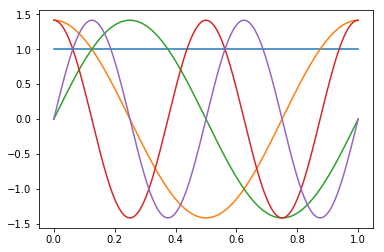

In [179]:
grid_x = np.linspace(0, 1, num = 10**3)
for j in np.arange(5)+1:
    plt.plot(grid_x, phij(j, grid_x), '-')
plt.show()

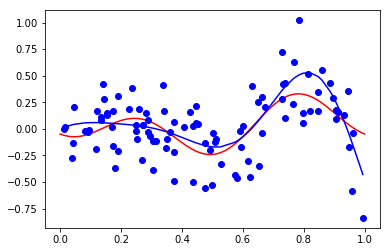

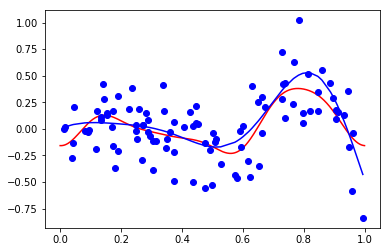

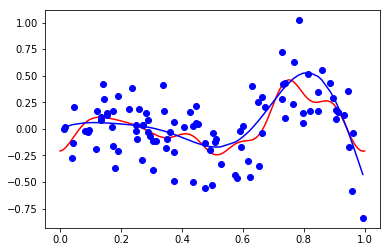

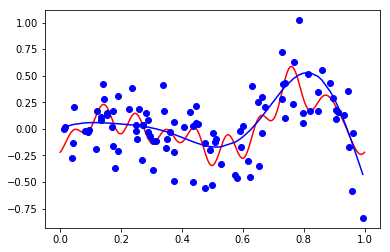

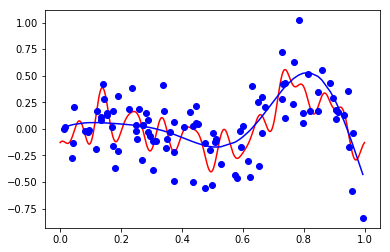

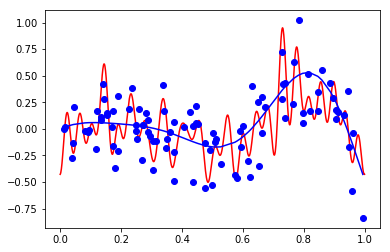

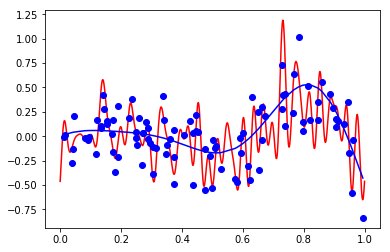

In [196]:
Ns = [5, 10, 15, 20, 30, 50, 70]
# Projection estimator
# Calculate the Fourier coefficients:
def theta(j):
    Theta = Y*phij(j, X)
    return np.mean(Theta)

def f_hat(N, x):
    F = np.array([theta(j)*phij(j, x) for j in np.arange(N)+1])
    return np.sum(F, axis=0)

for N in Ns:
    fN_hat = f_hat(N, grid_x)
    plt.plot(grid_x, fN_hat,'-r')
    plt.plot(X, Y, 'bo')
    plt.plot(X, f(X), '-b')
    plt.show()
